# Black friday dataset EDA and feature engineering

    Problem Statement:-
    A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

    Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv(r"E:\Black_Friday\train.csv")

In [4]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df_train.shape

(550068, 12)

In [6]:
df_test = pd.read_csv(r"E:\Black_Friday\test.csv")

In [7]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
df_test.shape

(233599, 11)

In [9]:
# Merge both the data sets
df = pd.concat([df_train, df_test], axis = 0)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
# Missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
# Duplicate value
df[df.duplicated()==True].count()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [15]:
# There are no duplicated rows present

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
# USer id is of no use for predicting purchase, do drop it

In [18]:
df.drop("User_ID", axis=1, inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
# Handle categoriocal feature 

In [21]:
## Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [23]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [26]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [27]:
df['Occupation'].isnull().sum()

0

In [28]:
# City_Category
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
encoder = OneHotEncoder(sparse=False)

In [31]:
encoder_new= encoder.fit_transform(df[['City_Category']])

In [32]:
city_category  = pd.DataFrame(data=encoder_new, columns=['A','B','C'])

In [33]:
city_category

,A,B,C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
783662,0.0,1.0,0.0
783663,0.0,1.0,0.0
783664,0.0,1.0,0.0
783665,0.0,0.0,1.0


In [34]:
df.shape

(783667, 11)

In [35]:
pd.concat([df,city_category], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [36]:
df = df.reset_index(drop=True)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [37]:
df=pd.concat([df,city_category], axis=1)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,1.0,0.0,0.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,1.0,0.0,0.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,1.0,0.0,0.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,0.0,1.0,0.0
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,0.0,1.0,0.0
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,0.0,1.0,0.0
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0.0,0.0,1.0


In [38]:
df.drop('City_Category', axis=1, inplace=True)

In [39]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1.0,0.0,0.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1.0,0.0,0.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1.0,0.0,0.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,0.0,1.0,0.0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,0.0,1.0,0.0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,0.0,1.0,0.0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0.0,0.0,1.0


In [40]:
# Stay_In_Current_city
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
A                             float64
B                             float64
C                             float64
dtype: object

In [42]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2216\1603793566.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace("+","")


In [43]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [44]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  float64
 11  B                           783667 non-null  float64
 12  C                           783667 non-null  float64
dtypes: float64(6),

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1.0,0.0,0.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1.0,0.0,0.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1.0,0.0,0.0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0.0,0.0,1.0


In [47]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [48]:
#handling Missing Values

In [49]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [50]:
# Missing values are present in product category 2 and 3. In Purchase it is of test data

In [51]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [52]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [53]:
# Since product category is discrete value, it is not continuous value, hence mean and median not to be used. we will use 
# mode to fill nan values.

In [59]:
df['Product_Category_2'].mode()[0]

8.0

In [55]:
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [56]:
df['Product_Category_2'].isnull().sum()

0

In [57]:
df['Product_Category_3'].isnull().sum()

545809

In [58]:
df['Product_Category_3'].mode()[0]

16.0

In [60]:
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [61]:
df['Product_Category_3'].isnull().sum()

0

In [62]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1.0,0.0,0.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1.0,0.0,0.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1.0,0.0,0.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,0.0,1.0


In [63]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [64]:
df['Product_ID'].count()

783667

In [65]:
df['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

In [66]:
df.drop('Product_ID', axis=1, inplace=True)

In [67]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1.0,0.0,0.0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1.0,0.0,0.0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1.0,0.0,0.0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,0.0,1.0


In [69]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
A                             float64
B                             float64
C                             float64
dtype: object

## Visualization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

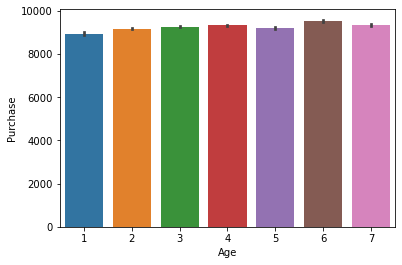

In [72]:
sns.barplot(x='Age',y='Purchase', data=df)

In [76]:
# People from age 51-55 made highest purchases

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

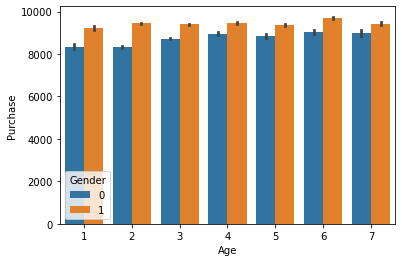

In [73]:
sns.barplot(x='Age',y='Purchase', data=df, hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

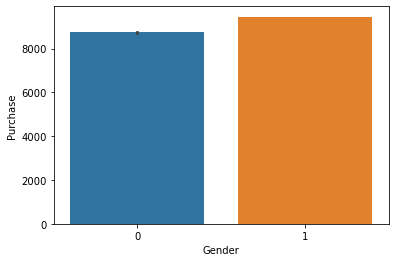

In [74]:
sns.barplot(x='Gender',y='Purchase', data=df)

In [75]:
# Men purchase more than women

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

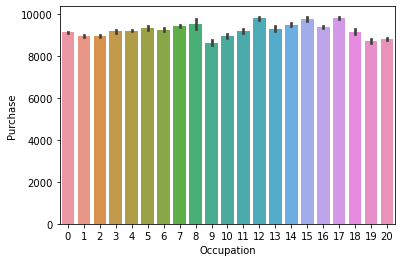

In [77]:
sns.barplot(x='Occupation',y='Purchase', data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

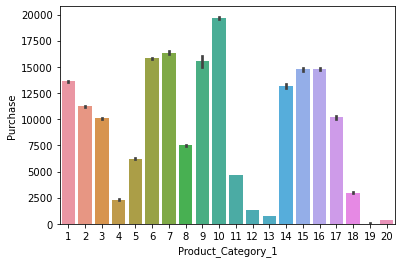

In [80]:
# Product category-1 vs Purchase
sns.barplot(x='Product_Category_1',y='Purchase', data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

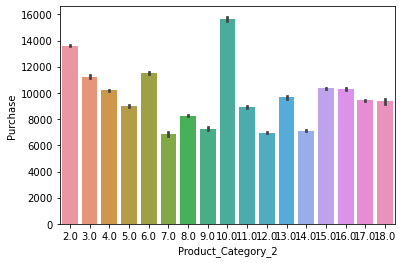

In [81]:
# Product category-2 vs Purchase
sns.barplot(x='Product_Category_2',y='Purchase', data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

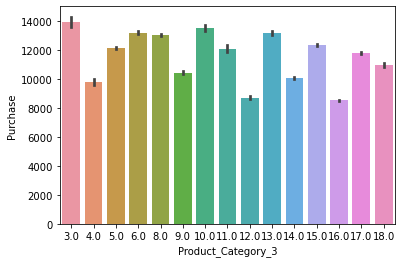

In [82]:
# Product category-3 vs Purchase
sns.barplot(x='Product_Category_3',y='Purchase', data=df)

## Feature Scaling

In [83]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1.0,0.0,0.0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1.0,0.0,0.0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1.0,0.0,0.0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,0.0,1.0


In [98]:
df.shape

(783667, 12)

In [99]:
df_test_data = df[df['Purchase'].isnull()]
df_test_data

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
550068,1,5,7,2,1,1,11.0,16.0,NaN,0.0,1.0,0.0
550069,1,3,17,0,0,3,5.0,16.0,NaN,0.0,0.0,1.0
550070,0,4,1,4,1,5,14.0,16.0,NaN,0.0,1.0,0.0
550071,0,4,1,4,1,4,9.0,16.0,NaN,0.0,1.0,0.0
550072,0,3,1,1,0,4,5.0,12.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,NaN,0.0,1.0,0.0
783663,0,3,15,4,1,5,8.0,16.0,NaN,0.0,1.0,0.0
783664,0,3,15,4,1,1,5.0,12.0,NaN,0.0,1.0,0.0
783665,0,5,1,4,0,10,16.0,16.0,NaN,0.0,0.0,1.0


In [100]:
df_train_data = df[~df['Purchase'].isnull()]
df_train_data

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1.0,0.0,0.0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1.0,0.0,0.0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1.0,0.0,0.0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1.0,0.0,0.0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368.0,0.0,1.0,0.0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0.0,0.0,1.0
550065,0,3,15,4,1,20,8.0,16.0,137.0,0.0,1.0,0.0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0.0,0.0,1.0


In [102]:
X = df_train_data.drop('Purchase', axis=1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,0,1,10,2,0,3,8.0,16.0,1.0,0.0,0.0
1,0,1,10,2,0,1,6.0,14.0,1.0,0.0,0.0
2,0,1,10,2,0,12,8.0,16.0,1.0,0.0,0.0
3,0,1,10,2,0,12,14.0,16.0,1.0,0.0,0.0
4,1,7,16,4,0,8,8.0,16.0,0.0,0.0,1.0


In [103]:
X.shape

(550068, 11)

In [104]:
y= df_train_data[['Purchase']]
y.head()

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0


In [105]:
X.shape

(550068, 11)

In [106]:
y.shape

(550068, 1)

In [107]:
# Train test split
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [109]:
X_train.shape

(385047, 11)

In [110]:
X_test.shape

(165021, 11)

In [112]:
y_train.shape

(385047, 1)

In [115]:
X_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
500304,1,3,16,0,0,8,14.0,16.0,1.0,0.0,0.0
16861,1,3,1,2,1,16,8.0,16.0,0.0,1.0,0.0
113230,1,2,7,1,0,8,16.0,16.0,1.0,0.0,0.0
434978,1,3,0,1,0,1,16.0,16.0,1.0,0.0,0.0
385516,0,4,3,3,1,3,4.0,5.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
110268,1,5,17,2,0,5,8.0,16.0,0.0,0.0,1.0
259178,1,3,14,2,1,5,8.0,16.0,0.0,0.0,1.0
365838,0,2,1,1,0,5,8.0,16.0,0.0,1.0,0.0
131932,0,2,4,2,0,8,14.0,16.0,0.0,1.0,0.0


In [116]:
X_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
84432,1,6,19,3,0,1,2.0,16.0,0.0,0.0,1.0
72724,0,4,11,1,0,1,15.0,16.0,0.0,1.0,0.0
197032,0,4,0,2,1,8,15.0,16.0,1.0,0.0,0.0
353704,1,2,4,3,0,1,15.0,16.0,1.0,0.0,0.0
91198,1,2,4,0,0,6,8.0,16.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
284287,1,4,0,2,0,5,9.0,16.0,0.0,0.0,1.0
50876,1,3,20,1,0,8,16.0,16.0,0.0,0.0,1.0
533433,1,2,16,1,0,1,17.0,16.0,0.0,0.0,1.0
44339,1,2,4,1,0,2,5.0,15.0,0.0,1.0,0.0


In [133]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [134]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [135]:
X_train

array([[ 0.57162531, -0.36693322,  1.21508142, ...,  1.64989906,
        -0.85069198, -0.67262255],
       [ 0.57162531, -0.36693322, -1.08479527, ..., -0.60609768,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.1648446 , ...,  1.64989906,
        -0.85069198, -0.67262255],
       ...,
       [-1.74939769, -1.1051074 , -1.08479527, ..., -0.60609768,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.62481993, ..., -0.60609768,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.93147016, ...,  1.64989906,
        -0.85069198, -0.67262255]])

In [136]:
X_test

array([[ 0.57162531,  1.8475893 ,  1.67505676, ..., -0.60609768,
        -0.85069198,  1.48671792],
       [-1.74939769,  0.37124095,  0.44845586, ..., -0.60609768,
         1.17551361, -0.67262255],
       [-1.74939769,  0.37124095, -1.23812038, ...,  1.64989906,
        -0.85069198, -0.67262255],
       ...,
       [ 0.57162531, -1.1051074 ,  1.21508142, ..., -0.60609768,
        -0.85069198,  1.48671792],
       [ 0.57162531, -1.1051074 , -0.62481993, ..., -0.60609768,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.62481993, ..., -0.60609768,
         1.17551361, -0.67262255]])

## Model Training

In [143]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [144]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [145]:
models = [LinearRegression(),Lasso(),Ridge(),ElasticNet(), RandomForestRegressor()]

for model in models:
    our_model = model
    our_model.fit(X_train,y_train)
    y_pred = our_model.predict(X_test)
    mae, mse, rmse, r2_square = evaluate_model(y_test, y_pred)
    print(our_model)
    print("Model Performance")
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2 Score: ", r2_square*100)
    print("=============================================")
    print("\n")
    


LinearRegression()
Model Performance
MAE:  3577.6652949181716
MSE:  21943867.99854818
RMSE:  4684.428246707188
R2 Score:  12.929019982748624


Lasso()
Model Performance
MAE:  3577.5200720758617
MSE:  21944337.225613773
RMSE:  4684.478330146674
R2 Score:  12.927158138681104


Ridge()
Model Performance
MAE:  3577.4333903489323
MSE:  21944298.527148426
RMSE:  4684.474199645935
R2 Score:  12.927311690156317


ElasticNet()
Model Performance
MAE:  3677.1605518762894
MSE:  22216136.59234993
RMSE:  4713.399685190078
R2 Score:  11.848686593402412




C:\Users\DELL\AppData\Local\Temp\ipykernel_2216\315294253.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  our_model.fit(X_train,y_train)


RandomForestRegressor()
Model Performance
MAE:  2223.351525366834
MSE:  9322860.231675362
RMSE:  3053.3359185774766
R2 Score:  63.00786274372692


